###### Author:Saransh Bairagi

In [1]:
# Boiler PLate of Libraries
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
import math
import scipy
from scipy import stats
from scipy.stats import moment,kurtosis,skew
from sklearn.impute import SimpleImputer
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# load Dummy/Custom Data
names=sns.get_dataset_names()
print(names)
df=sns.load_dataset('taxis')
DF=df.copy()
df.head()

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


# Datatypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [4]:
# Storing Features Categorically
categoric_features=[]
numeric_features=[]
categoric_features=df.select_dtypes(exclude=['number', 'datetime']).columns.values
numeric_features=df.select_dtypes(include=['number']).columns.values
categoric_features=categoric_features.tolist()
numeric_features=numeric_features.tolist()
print("numeric Features are: ",numeric_features)
print("Categoric Features are: ",categoric_features)

numeric Features are:  ['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']
Categoric Features are:  ['color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough']


In [5]:
if(len(categoric_features)+len(numeric_features)!=len(df.columns)):
    val=[]
    typeval=[]
    for i in df.columns:
        if i not in numeric_features and i not in categoric_features:
            val.append(i)
    print("Sum Features are not Covered and are: ",val)
else:
    print("All Features Covered")

Sum Features are not Covered and are:  ['pickup', 'dropoff']


# Null Values Findings & Removal
### Deletetion OR Imputation OR Interpolation OR Extrapolation

In [6]:
deleterows=False

In [7]:
null_container = pd.Series(df.isnull().sum())
null_container = null_container[null_container > 0]
null_container= null_container.sort_values(ascending=False)
if(len(null_container)>0):
    print(f"This Dataset has Null Values which should be removed before processing")
    print(f"with highest null values in {null_container.index[0]} and lowest null values in {null_container.index[len(null_container)-1]}")
    windowsize=30
    print(f"Feature Name{(windowsize-12)*' '}Count of Null Values")
    for idx in range(len(null_container)):
        print(f"{null_container.index[idx]}{(windowsize-len(null_container.index[idx]))*' '}{null_container.values[idx]}{(windowsize-len(str(null_container.values[idx])))*' '}{100*(null_container.values[idx]/len(df))}")
else:
    print("Dataset is Null Values Free!!")

This Dataset has Null Values which should be removed before processing
with highest null values in dropoff_zone and lowest null values in pickup_borough
Feature Name                  Count of Null Values
dropoff_zone                  45                            0.699518109746619
dropoff_borough               45                            0.699518109746619
payment                       44                            0.6839732628633608
pickup_zone                   26                            0.4041660189647132
pickup_borough                26                            0.4041660189647132


In [8]:
total_percent=0
for idx in range(len(null_container)):
    total_percent+=null_container.values[idx]
total_percent/=(len(df))
total_percent*=100

In [9]:
if deleterows:
    if(total_percent<5):
        print("Since total percent of NUll VALUES is less than 5 we can remove all rows with null values")
        df=df.dropna()
    else:
        print("Since NULL VALUES ARE HIGh We can use few methods...")
else:
    print("Deleterows is off")

    

Deleterows is off


In [10]:
df['payment'].count()

6389

In [11]:
# -----------Functions returning dataframes
# Put previous value
def fprev(df):
    df.fillna(method='pad')

#Put next value
def fnex(df):
    df.bfill()

# Fill with particular value
def inval(df,val):
    df.fillna(val)
#Imputation

# replace values with most frequent ones
def cat1(df):
    for val in categoric_features:
        valitemp=df[val].value_counts().sort_values(ascending=False).index[0]
        df[val]=df[val].replace(np.nan,valitemp,inplace=False)
    return df

# replace with our custom class
def cat2(df):
    # should be atleast len(catecategoric_features)long
    tobe=['ds','ds','ds','ds','ds','ds','ds']
    idx=0
    for val in categoric_features:
        df[val]=df[val].fillna(tobe[idx])
        idx+=1
    return df
def inPut(df):
    #for categoric data
    for val in categoric_features:
        df=cat1(df)
        # df=cat2(df)
    # for numeric data
    for val in numeric_features:
        sk=skew(df.loc[df[val].isnull()==False,val])
        if(abs(sk)<=0.5):
            df[val].replace(np.nan,np.mean(df.loc[df[val].isnull()==True]))
        else:
            medien=(np.median(df.loc[df[val].isnull()==False,[val]]))
            df[val]=df[val].replace(np.nan,medien,inplace=False)
inPut(df)


In [12]:
print(f"Checking Whether Null Values are removed(if present) in dataset with size={len(df)}")
df.isnull().sum()

Checking Whether Null Values are removed(if present) in dataset with size=6433


pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

# Working with Outliers
##### Trimming:-Delete Completely || Capping:-Gives Fix Values

In [13]:
def trimming(df,feature_name,rate=1):
    LL=df[feature_name].quantile(0.25)
    UU=df[feature_name].quantile(0.75)
    IQR=UU-LL
    LLQ=LL-(rate*IQR)
    UUQ=UU+(rate*IQR)
    df=df.loc[(df[feature_name]<=UUQ)&(df[feature_name]>=LLQ),:]
    return df
def capping(df,feature_name,rate=0):
    LL=df[feature_name].quantile(0.25)
    UU=df[feature_name].quantile(0.75)
    IQR=UU-LL
    LLQ=LL-(rate*IQR)
    UUQ=UU+(rate*IQR)
    df[feature_name]=np.where(df[feature_name]>UUQ,UUQ,np.where(df[feature_name]<LLQ,LLQ,df[feature_name]))
    return df

# Ignoring Features

In [14]:
#defining functions
def ignore(listofcols,numeric_features=numeric_features,categoric_features=categoric_features):
    for val in listofcols:
        for c in numeric_features:
            if(val==c):
                numeric_features.remove(val)
        for c in categoric_features:
            if(val==c):
                categoric_features.remove(val)

In [15]:
# ignore(["year"],numeric_features,categoric_features)

# Univariate Data Explore

## - Categoric Data

In [16]:
# Count of Class
for i in range(len(categoric_features)):
    print(f"for Feature name- {categoric_features[i]},Classes are ")
    print(df.loc[:,categoric_features[i]].unique())
    print(f"and its count is")
    print(df.loc[:,categoric_features[i]].value_counts())

for Feature name- color,Classes are 
['yellow' 'green']
and its count is
color
yellow    5451
green      982
Name: count, dtype: int64
for Feature name- payment,Classes are 
['credit card' 'cash']
and its count is
payment
credit card    4621
cash           1812
Name: count, dtype: int64
for Feature name- pickup_zone,Classes are 
['Lenox Hill West' 'Upper West Side South' 'Alphabet City' 'Hudson Sq'
 'Midtown East' 'Times Sq/Theatre District' 'Battery Park City'
 'Murray Hill' 'East Harlem South' 'Lincoln Square East'
 'LaGuardia Airport' 'Lincoln Square West' 'Financial District North'
 'Upper West Side North' 'East Chelsea' 'Midtown Center' 'Gramercy'
 'Penn Station/Madison Sq West' 'Sutton Place/Turtle Bay North'
 'West Chelsea/Hudson Yards' 'Clinton East' 'Clinton West'
 'UN/Turtle Bay South' 'Midtown South' 'Midtown North' 'Garment District'
 'Lenox Hill East' 'Flatiron' 'TriBeCa/Civic Center'
 'Upper East Side North' 'West Village' 'Greenwich Village South'
 'JFK Airport' 'East Vi

#### Plots

Showing Frequency for each class
pickup_zone have higher classes than usual calculate seperately
dropoff_zone have higher classes than usual calculate seperately


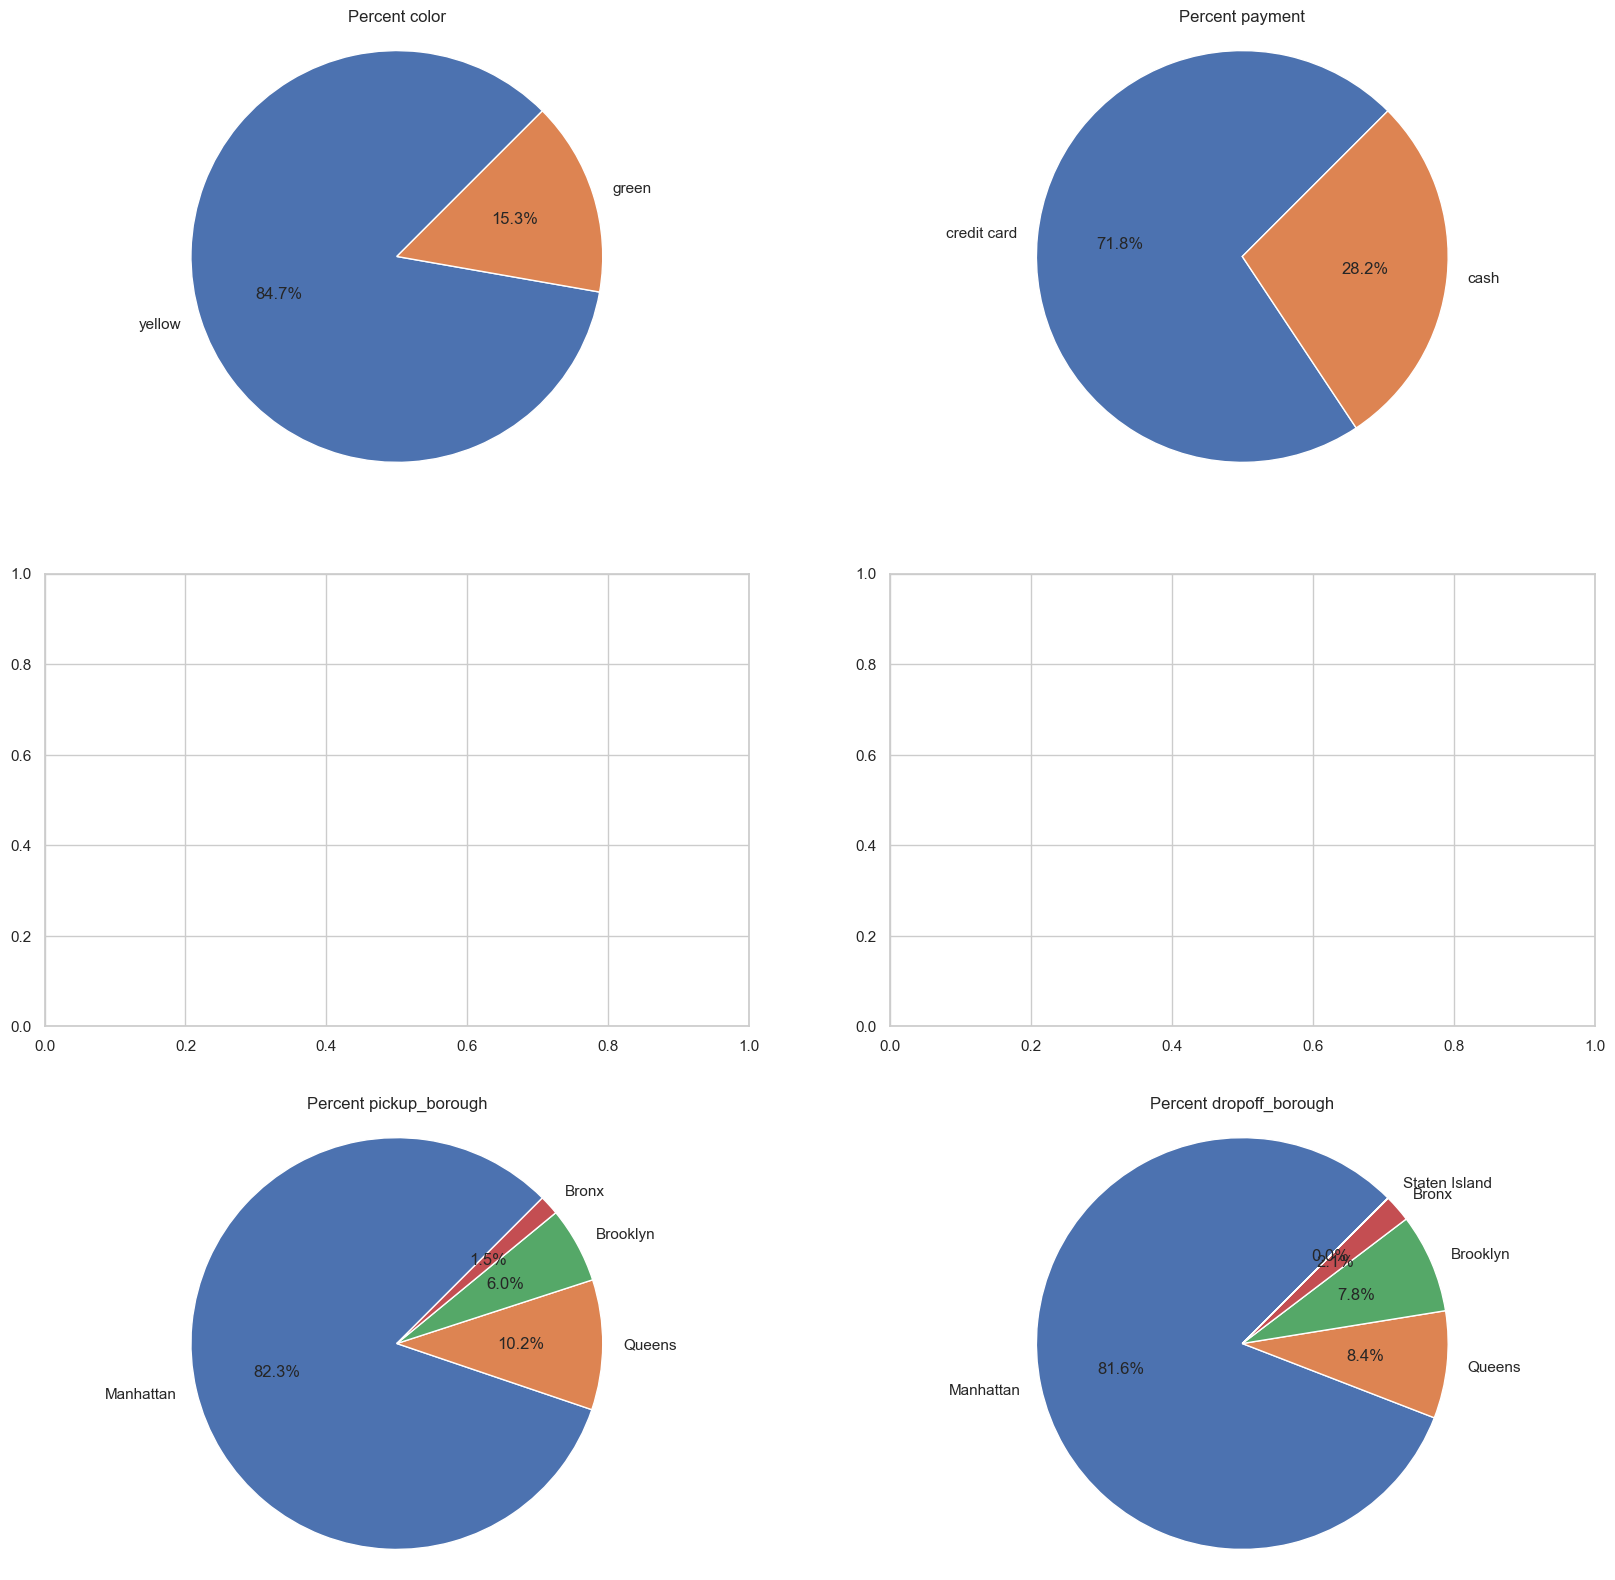

In [17]:
#Pie Plot (frequency vs class)
n=len(categoric_features)
plt.figure(figsize=(20, 20))
print("\033[1mShowing Frequency for each class\033[0m")
for i in range(len(categoric_features)):
    plt.subplot(math.ceil(n/2),2,i+1)
    if(len(df[categoric_features[i]].unique())>10):
        print(f"{categoric_features[i]} have higher classes than usual calculate seperately")
        continue
    plt.pie(df.loc[:,categoric_features[i]].value_counts(), labels=df.loc[:,categoric_features[i]].value_counts().index, autopct='%1.1f%%', startangle=45)
    plt.axis('equal')  
    plt.title(f"Percent {categoric_features[i]}")

Showing Frequency for each class
pickup_zone have higher classes than usual calculate seperately
dropoff_zone have higher classes than usual calculate seperately


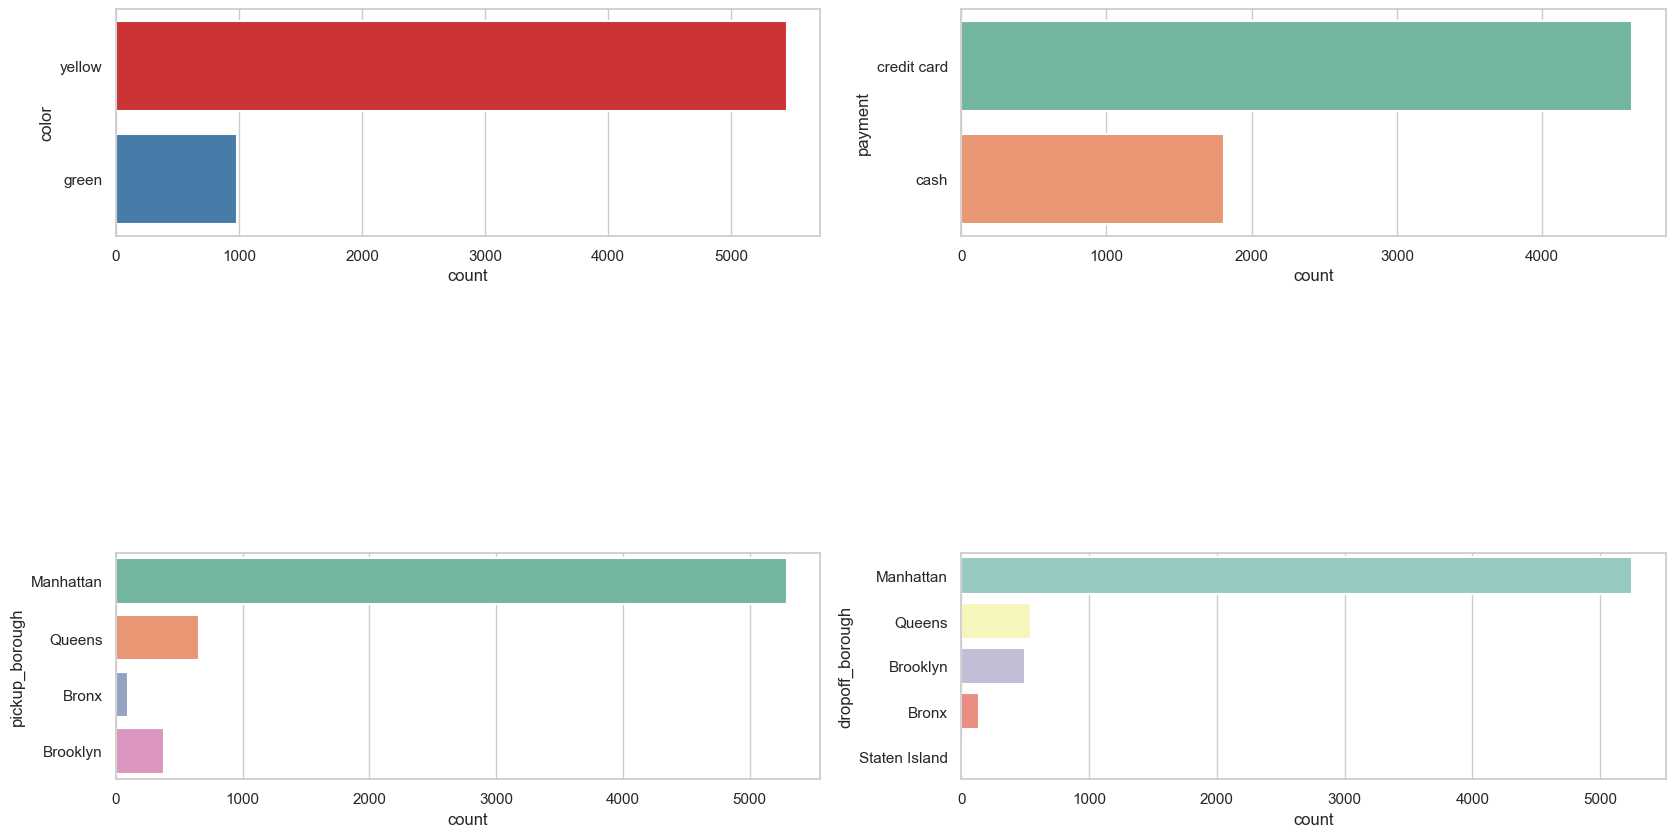

In [18]:
#Count Plot (frequency vs class)
n=len(categoric_features)
plt.figure(figsize=(20, 10))
print("\033[1mShowing Frequency for each class\033[0m")
for i in range(len(categoric_features)):
    if(len(df[categoric_features[i]].unique())>10):
        print(f"{categoric_features[i]} have higher classes than usual calculate seperately")
        continue
    plt.subplot(math.ceil(n/2),2,i+1)
    temp=df[categoric_features[i]]
    palette = {category: color for category, color in zip(temp.unique(), sns.color_palette(f"Set{1+(i%3)}", len(temp.unique())))}
    sns.countplot(y=temp, palette=palette,hue=temp, linewidth=1.5)

## - Numeric Data

In [19]:
#Metrices
X=df.describe()

# ----------------
def withoutnull(df,val):
    return df.loc[df[val].isnull()==False,val]
for i in range(4):
    dic={}
    for val in numeric_features:
       dic.update({val:moment(withoutnull(df,val),i+1)})
    X.loc[f"{i+1}th moment"]=dic
dic={}
for val in numeric_features:
    dic.update({val:kurtosis(withoutnull(df,val))})
X.loc['Kurtosis']=dic
def t(kurtosis):
    if(abs(kurtosis)<1e-1):
        return "Mesokurtic"
    elif (kurtosis>0):
        return "Leptokurtic"
    else:
        return "platokurtic"
dic={}
for val in numeric_features:
    dic.update({val:t(kurtosis(withoutnull(df,val)))})
X.loc['Type']=dic
dic={}
for val in numeric_features:
    dic.update({val:skew(withoutnull(df,val))})
X.loc['Skewness']=dic
# -------------

print("Numeric Data Metrix ")
X

Numeric Data Metrix 


,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.0,6433.0,6433.0,6433.0,6433.0,6433.0
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.0,0.0,1.0,0.0,0.0,1.3
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.0,0.98,6.5,0.0,0.0,10.8
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.0,1.64,9.5,1.7,0.0,14.16
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.0,3.21,15.0,2.8,0.0,20.3
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.0,36.7,150.0,33.2,24.02,174.82
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.81557
1th moment,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2th moment,NaN,NaN,1.448832,14.650288,133.423438,5.994512,2.00267,190.840305


#### Plots

Showing BoxPlot for each Numeric Feature


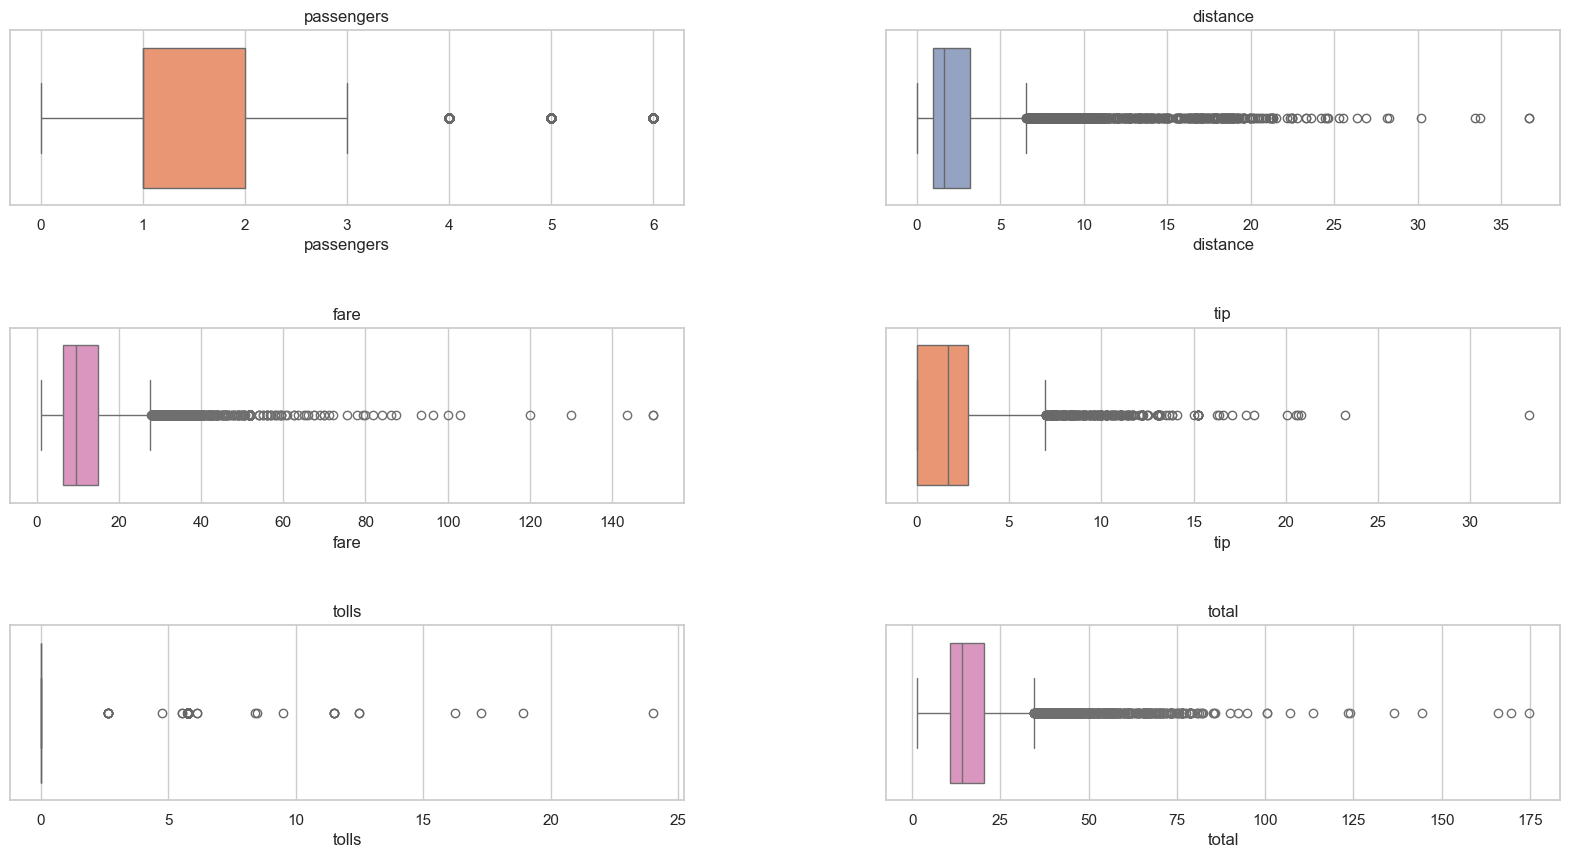

In [20]:
# BoxPlots
n=len(numeric_features)
plt.figure(figsize=(20, 10))
print("\033[1mShowing BoxPlot for each Numeric Feature\033[0m")
for i in range(len(numeric_features)):
    plt.subplot(math.ceil(n/2),2,i+1)
    temp=df[numeric_features[i]]
    palette = sns.color_palette("Set2")

    sns.boxplot(data=temp,orient='h',color=palette[i%3+1])
    plt.title(numeric_features[i])
    plt.subplots_adjust(hspace=0.7, wspace=0.3)

Showing Distribution Plots for each Numeric Feature


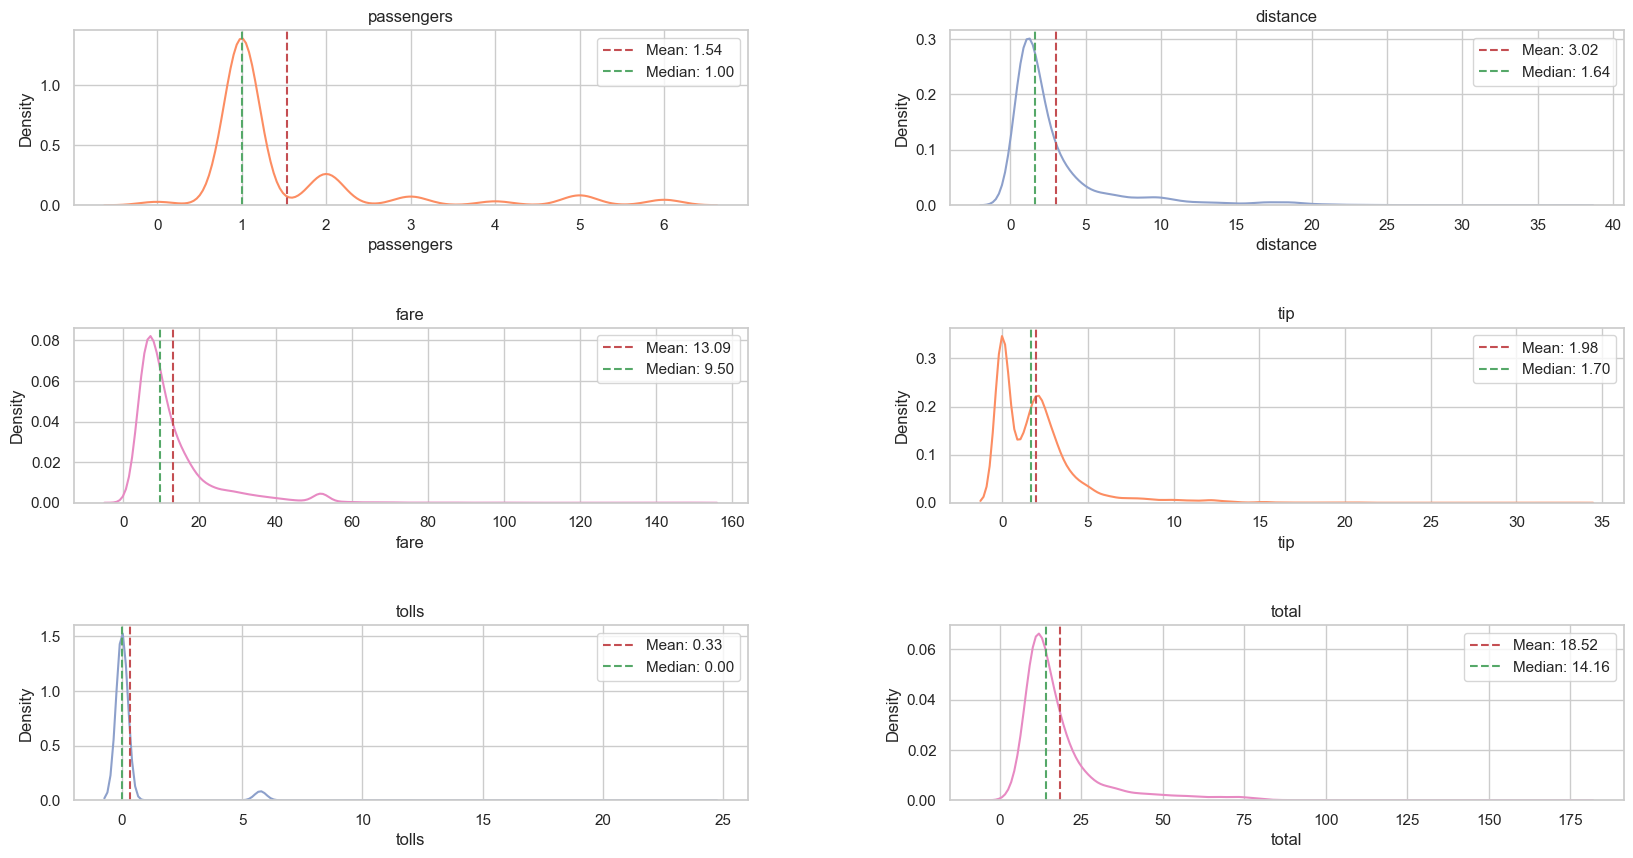

In [21]:
# DistributionPlots
n=len(numeric_features)
plt.figure(figsize=(20, 10))
print("\033[1mShowing Distribution Plots for each Numeric Feature\033[0m")
for i in range(len(numeric_features)):
    plt.subplot(math.ceil(n/2),2,i+1)
    temp=df[numeric_features[i]]
    palette = sns.color_palette("Set2")

    sns.kdeplot(temp,color=palette[i%3+1])
    mean_val = df[numeric_features[i]].mean()
    median_val = df[numeric_features[i]].median()
    
    # Annotate mean and median values
    plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='g', linestyle='--', label=f'Median: {median_val:.2f}')
    plt.title(numeric_features[i])
    plt.legend()
    plt.subplots_adjust(hspace=0.7, wspace=0.3)

Showing Histograms for each Numeric Feature


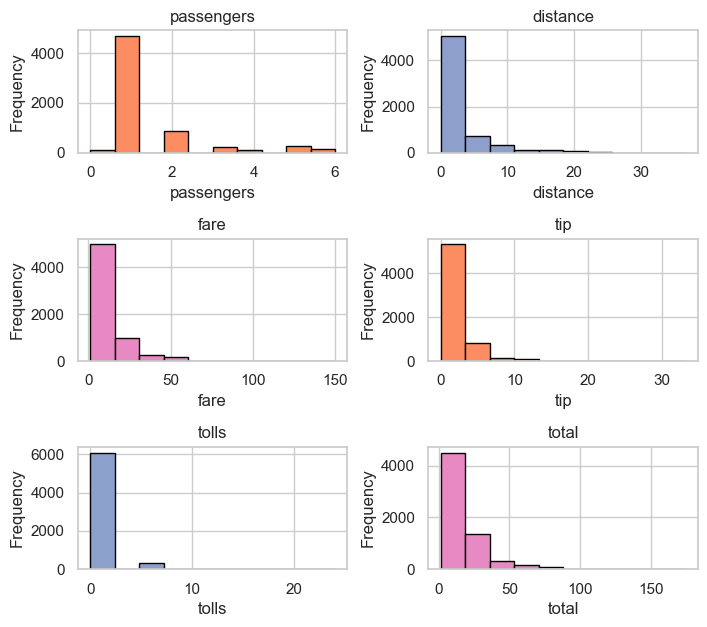

In [22]:
# HistPlots
n=len(numeric_features)
plt.figure(figsize=(8 ,7))
print("\033[1mShowing Histograms for each Numeric Feature\033[0m")
for i in range(len(numeric_features)):
    plt.subplot(math.ceil(n/2),2,i+1)
    temp=df[numeric_features[i]]
    palette = sns.color_palette("Set2")
    plt.hist(temp, bins=10, color=palette[i%3+1], edgecolor='black')
    plt.xlabel(numeric_features[i])
    plt.ylabel('Frequency')
    plt.title(numeric_features[i])
    plt.subplots_adjust(hspace=0.7, wspace=0.3)

# Bivariate Data Explore

## - Categoric Data vs Categoric Data

In [23]:
categoric_features

['color',
 'payment',
 'pickup_zone',
 'dropoff_zone',
 'pickup_borough',
 'dropoff_borough']

In [24]:
N=0
for i in range(len(categoric_features)):
    for j in range(i+1,len(categoric_features)):
        N+=1
        print(pd.crosstab(df[categoric_features[i]],df[categoric_features[j]]),"\n     -----\n")

payment  cash  credit card
color                     
green     400          582
yellow   1412         4039 
     -----

pickup_zone  Allerton/Pelham Gardens  Alphabet City  Astoria  Auburndale  \
color                                                                      
green                              2              0       52           1   
yellow                             0              9       13           0   

pickup_zone  Battery Park  Battery Park City  Bay Ridge  Bayside  Bedford  \
color                                                                       
green                   0                  0          3        1        2   
yellow                  1                 43          0        0        1   

pickup_zone  Bedford Park  ...  Whitestone  Williamsbridge/Olinville  \
color                      ...                                         
green                   1  ...           1                         1   
yellow                  0  ...           0       

###### advanced cross table combinations

In [25]:
for i in range(len(categoric_features)):
    x=[]
    for j in range(i+1,len(categoric_features)):
        x.append(df[categoric_features[j]]) 
        print(pd.crosstab(categoric_features[i],x),"\n\n")

payment  cash  credit card
row_0                     
color    1812         4621 


payment              cash                                                 \
pickup_zone Alphabet City Astoria Battery Park Battery Park City Bedford   
row_0                                                                      
color                   2      44            1                 5       1   

payment                                                                    \
pickup_zone Belmont Bloomingdale Boerum Hill Brooklyn Heights Brownsville   
row_0                                                                       
color             2            8           6               14           1   

payment      ... credit card                           \
pickup_zone  ...  Whitestone Williamsbridge/Olinville   
row_0        ...                                        
color        ...           1                        2   

payment                                                          \
pickup

#### Plots

pickup_zone have higher classes than usual calculate seperately
pickup_zone have higher classes than usual calculate seperately
dropoff_zone have higher classes than usual calculate seperately


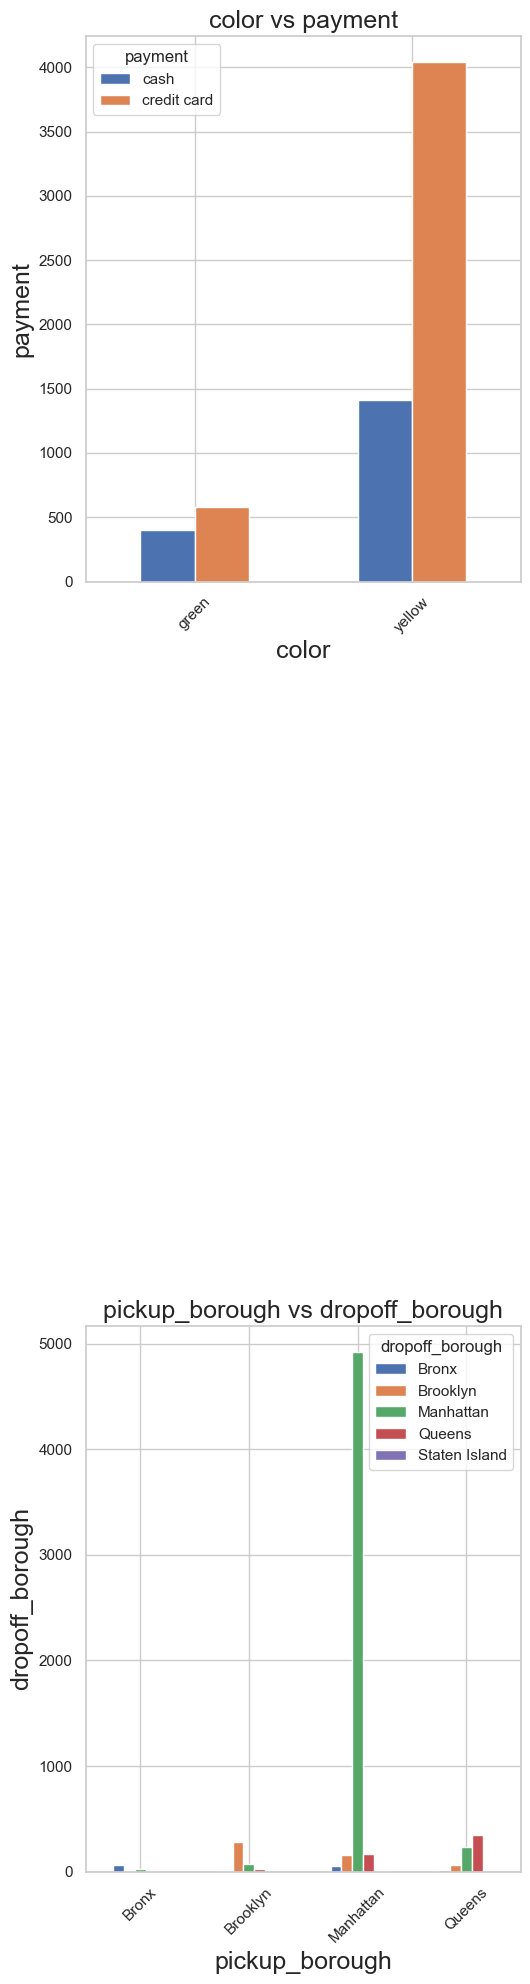

In [26]:
# Cross Table based bars
num_features = len(categoric_features)
num_rows = num_features // 2 + num_features % 2  # Calculate the number of rows needed

plt.figure(figsize=(10, 20))

for idx, (i, j) in enumerate(zip(categoric_features[:-1], categoric_features[1:]), start=1):
    if(len(df[i].unique())>10):
        print(f"{i} have higher classes than usual calculate seperately")
        continue
    if(len(df[j].unique())>10):
        print(f"{j} have higher classes than usual calculate seperately")
        continue
    plt.subplot(num_rows, 2, idx)
    cross_tab = pd.crosstab(df[i], df[j])
    cross_tab.plot(kind='bar', ax=plt.gca(), legend=True) 
    plt.title(f'{i} vs {j}', fontsize=18)
    plt.xlabel(i, fontsize=18)
    plt.ylabel(j, fontsize=18)
    plt.xticks(rotation=45)  
    plt.subplots_adjust(hspace=0.6, wspace=0.3)

plt.tight_layout()
plt.show()

pickup_zone have higher classes than usual calculate seperately
pickup_zone have higher classes than usual calculate seperately
dropoff_zone have higher classes than usual calculate seperately


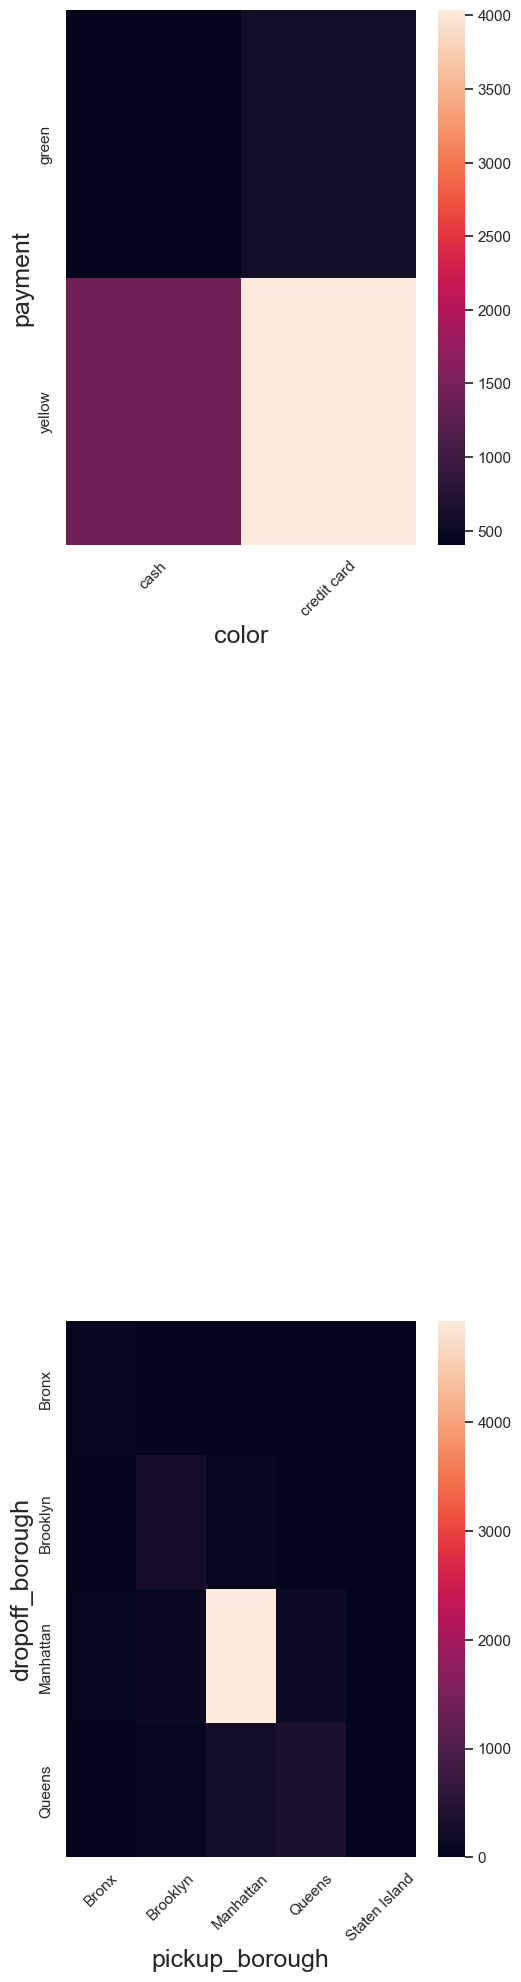

In [27]:
# SNS HeatMaps
num_features = len(categoric_features)
num_rows = num_features // 2 + num_features % 2  # Calculate the number of rows needed

plt.figure(figsize=(10, 20))

for idx, (i, j) in enumerate(zip(categoric_features[:-1], categoric_features[1:]), start=1):
    if(len(df[i].unique())>10):
        print(f"{i} have higher classes than usual calculate seperately")
        continue
    if(len(df[j].unique())>10):
        print(f"{j} have higher classes than usual calculate seperately")
        continue
    plt.subplot(num_rows, 2, idx)
    cross_tab = pd.crosstab(df[i], df[j])
    sns.heatmap(cross_tab)
    plt.xlabel(i, fontsize=18)
    plt.ylabel(j, fontsize=18)
    plt.xticks(rotation=45)  
    plt.subplots_adjust(hspace=0.6, wspace=0.3)

plt.tight_layout()
plt.show()

## - Categoric Data vs Numerical Data

pickup_zone have higher classes calucalate seperate
pickup_zone have higher classes calucalate seperate
pickup_zone have higher classes calucalate seperate
pickup_zone have higher classes calucalate seperate
pickup_zone have higher classes calucalate seperate
pickup_zone have higher classes calucalate seperate
dropoff_zone have higher classes calucalate seperate
dropoff_zone have higher classes calucalate seperate
dropoff_zone have higher classes calucalate seperate
dropoff_zone have higher classes calucalate seperate
dropoff_zone have higher classes calucalate seperate
dropoff_zone have higher classes calucalate seperate


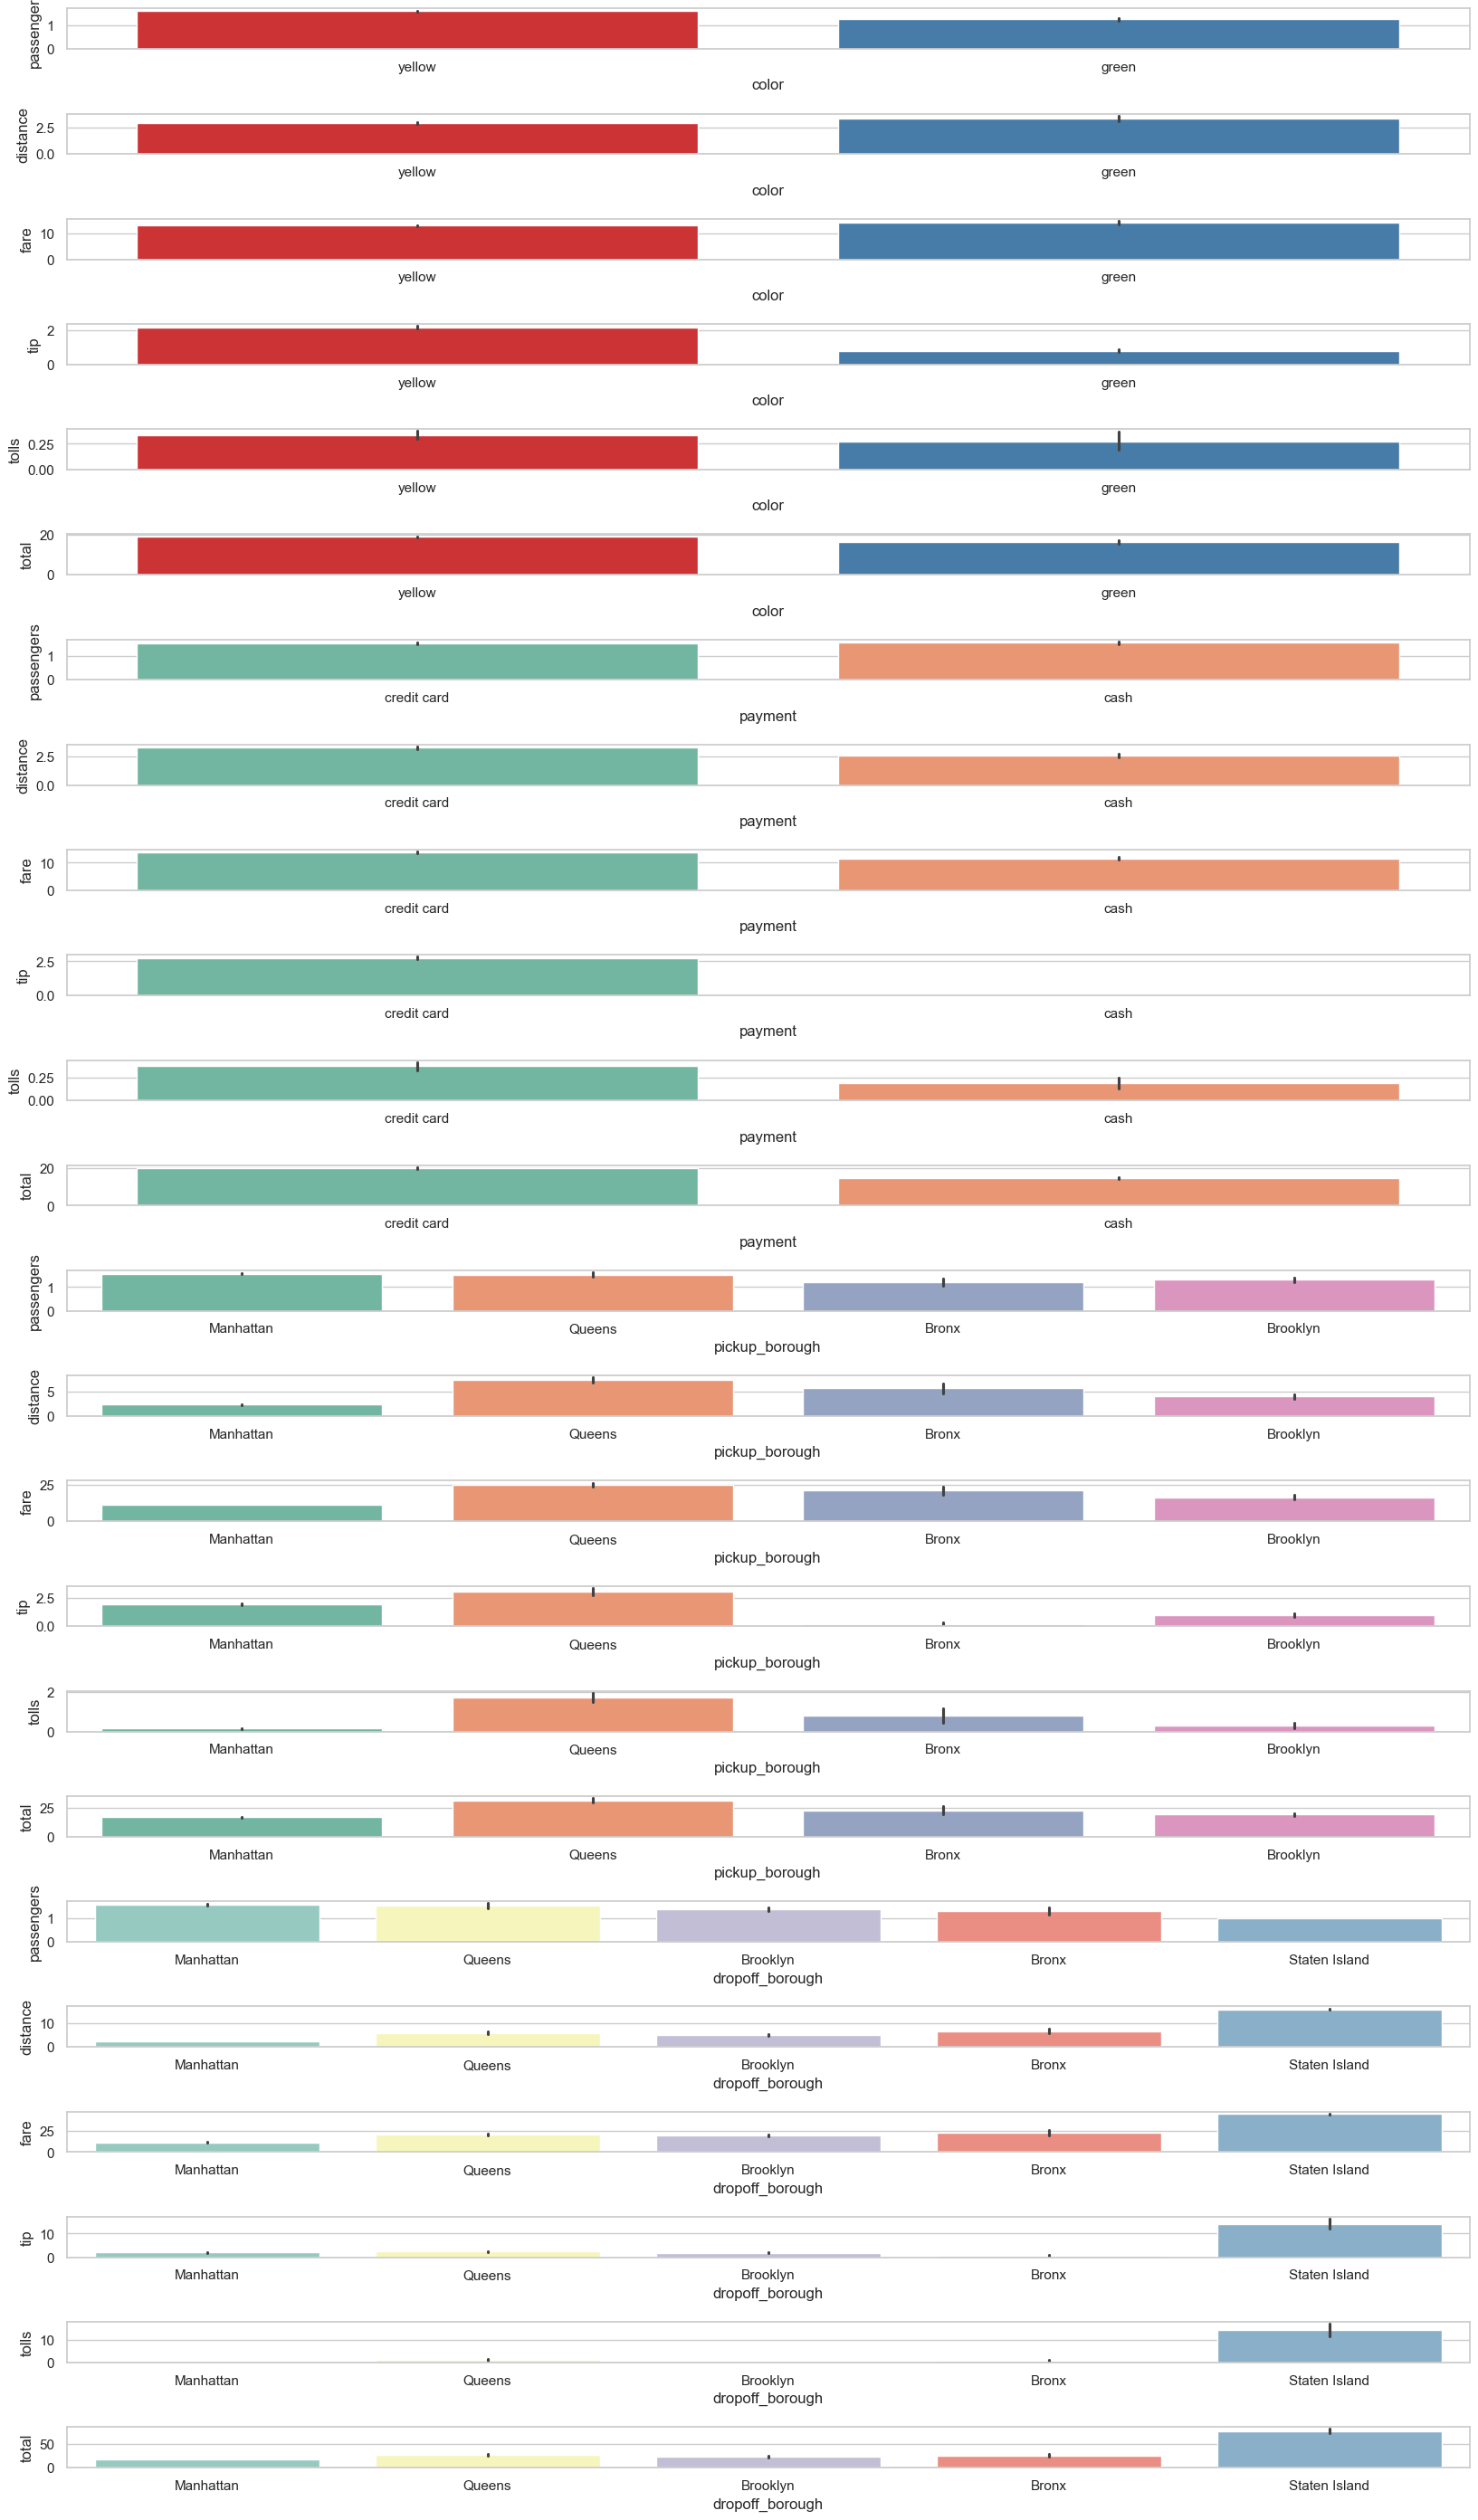

In [28]:
idx = 1
plt.figure(figsize=(20, 150))

n = len(categoric_features) * len(numeric_features)
for i in range(len(categoric_features)):
    for j in range(len(numeric_features)):
        if(len(df[categoric_features[i]].unique())>10):
            print(f"{categoric_features[i]} have higher classes calucalate seperate")
            continue
        plt.subplot(100, 1, idx)
        idx += 1
        temp = df[categoric_features[i]]
        palette = {category: color for category, color in zip(temp.unique(), sns.color_palette(f"Set{1 + (i % 3)}", len(temp.unique())))}
        sns.barplot(x=categoric_features[i], y=numeric_features[j], data=df, palette=palette,hue=temp,legend=False)
        plt.subplots_adjust(hspace=1.6, wspace=0.3)
plt.show()


## - Numerical Data vs Numerical Data

Showing ScatterPlots for each Numeric Feature


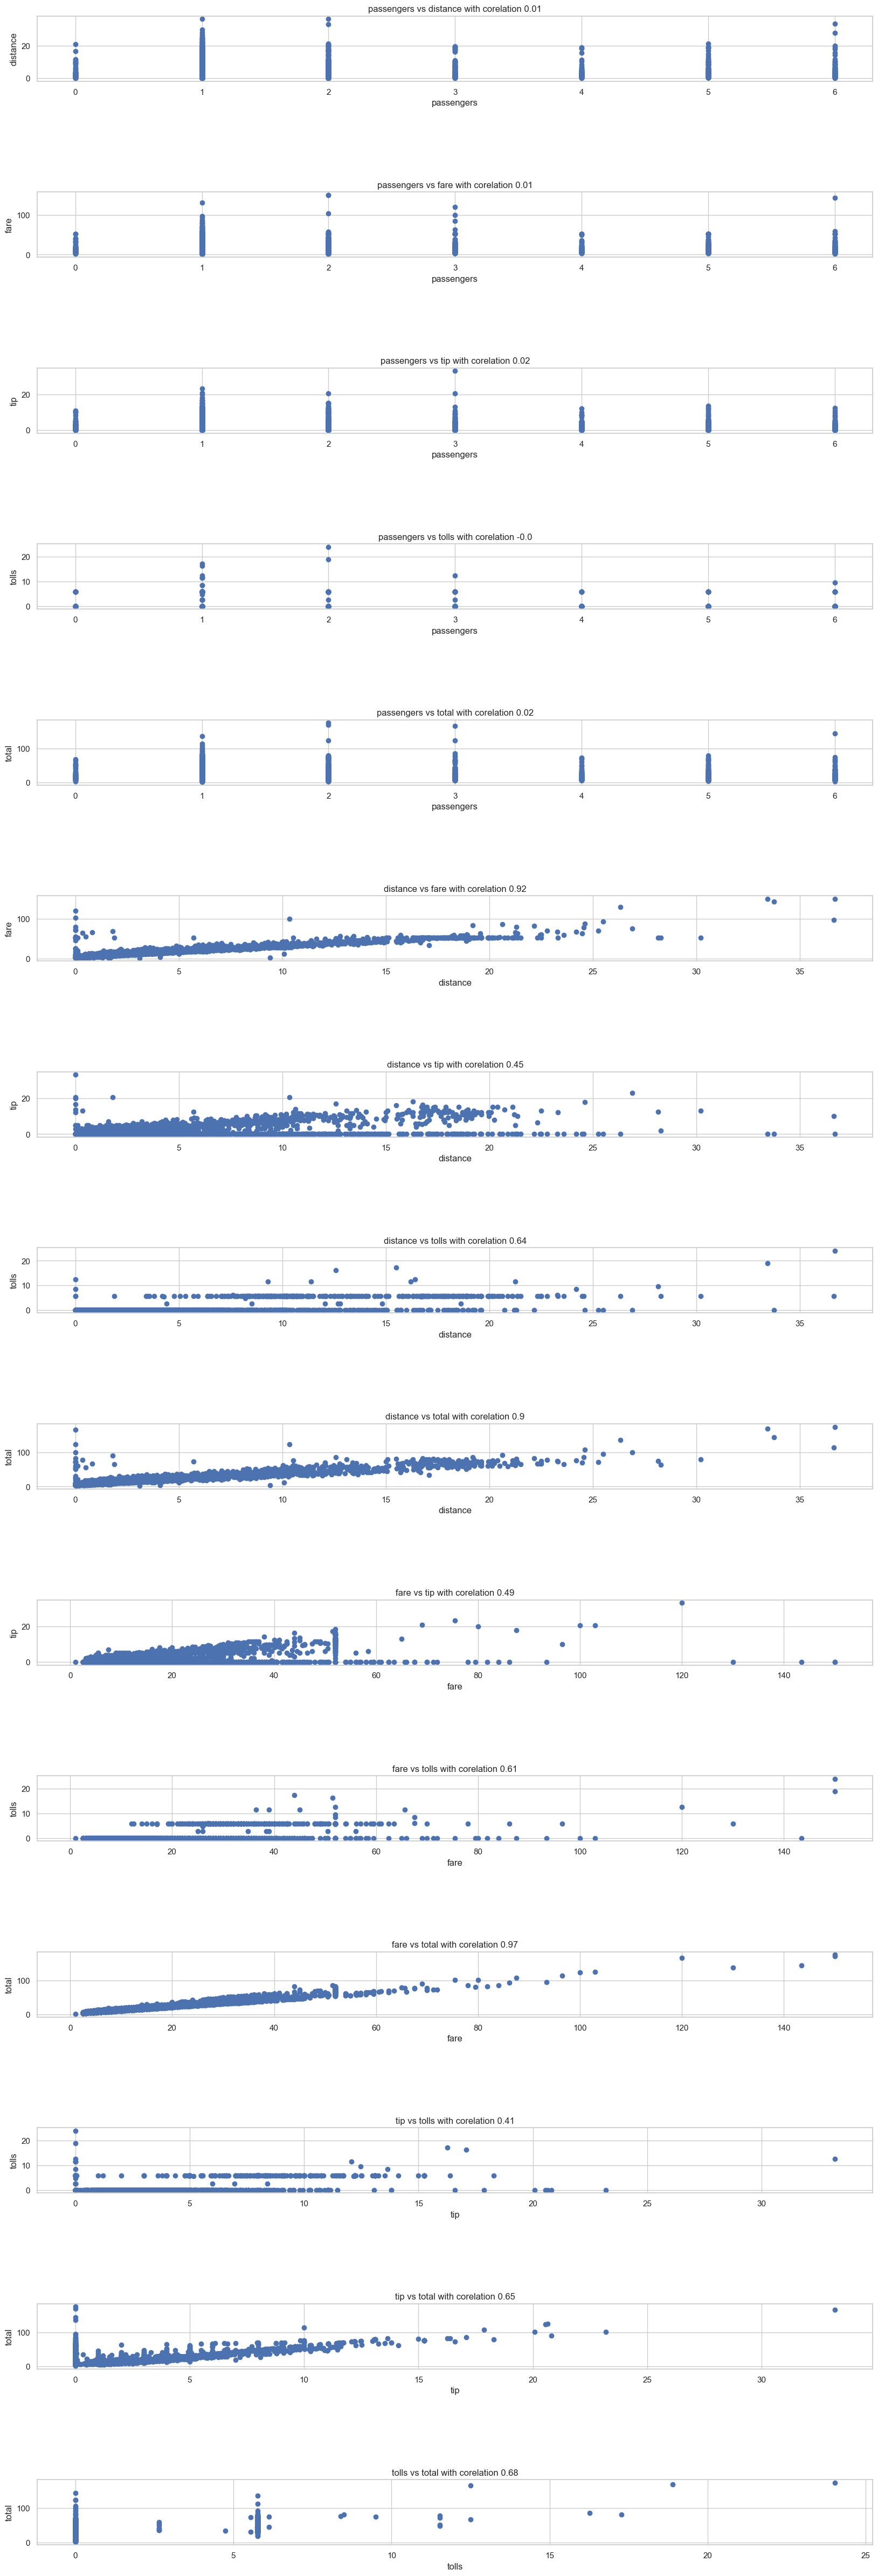

In [29]:
# Plots Scattering
n = len(numeric_features)
idx = 1
plt.figure(figsize=(20, 150))
print("\033[1mShowing ScatterPlots for each Numeric Feature\033[0m")
for i in range(n):
    for j in range(i + 1, n):
        plt.subplot(n*n, 1, idx)
        idx += 1
        plt.scatter(df[numeric_features[i]], df[numeric_features[j]])
        plt.xlabel(numeric_features[i])
        plt.ylabel(numeric_features[j])
        plt.title(f"{numeric_features[i]} vs {numeric_features[j]} with corelation {round(np.corrcoef(df[numeric_features[i]], df[numeric_features[j]])[0][1],2)}")
        plt.subplots_adjust(hspace=1.7, wspace=0.3)

plt.show()

### Corelation Outputs

In [30]:
for i in range(len(numeric_features)):
    for j in range(i+1,len(numeric_features)):
        CC=round(np.corrcoef(df[numeric_features[i]], df[numeric_features[j]])[0][1],2)
        if(abs(CC)<0.1):
            print(f"There is no good corelation between {numeric_features[i]} and {numeric_features[j]}")
        elif (CC>=0.1):
            print(f"There's positive corelation with value={CC} between {numeric_features[i]} and {numeric_features[j]}")
        else:
            print(f"There's negative corelation with value={CC} between {numeric_features[i]} and {numeric_features[j]}")
                 

There is no good corelation between passengers and distance
There is no good corelation between passengers and fare
There is no good corelation between passengers and tip
There is no good corelation between passengers and tolls
There is no good corelation between passengers and total
There's positive corelation with value=0.92 between distance and fare
There's positive corelation with value=0.45 between distance and tip
There's positive corelation with value=0.64 between distance and tolls
There's positive corelation with value=0.9 between distance and total
There's positive corelation with value=0.49 between fare and tip
There's positive corelation with value=0.61 between fare and tolls
There's positive corelation with value=0.97 between fare and total
There's positive corelation with value=0.41 between tip and tolls
There's positive corelation with value=0.65 between tip and total
There's positive corelation with value=0.68 between tolls and total


# Exporting new Dataframe(if edited) to specific folder

In [34]:
directory = os.path.join(os.getcwd(),"Editedcsv")

# Check if the directory exists
if not os.path.exists(directory):
    # Create the directory if it doesn't exist
    os.makedirs(directory)
filename="EditedCSV of lorelepsum.csv"
df.to_csv(os.path.join(directory,filename),index=False)

# Write Custom Insights here
#### Points:
* Lorel Epsum-1

# More Analysis
* T test for classes==2
* Annova for clases>2